<a href="https://colab.research.google.com/github/shshchoi/bigdata/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC(19006060%20%EC%B5%9C%EC%84%B1%ED%98%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기말고사
각 텍스트 문제 뒤에 코드블럭을 생성하여 문제에 대한 답을 코드로 적어보자. 과제는 올림픽 메달 집계 위키페이지 데이터를 지시대로 가공하는 것이다. 오픈북이니 마음껏 검색하거나 예전 수업자료를 보아도 된다. 단, 판다스 라이브러리를 사용해야 한다. 문제는 총 13문제이다.

*   코드를 완성, 실행한 후 깃허브 저장소에 **'기말고사(학번 이름)'의 파일명**으로 사본저장한다.
* 업로드 후 **저장소** 주소와 노션 포트폴리오 주소를 pdf로 작성하여 캔버스로 제출한다 (4시 반까지)

** 아래 코드로 데이터를 가져올 수 없다면 구글에서 '올림픽 메달 집계' 검색 후 위키페이지의 주소를 복사해서 알맞게 코드를 변형한다. (교재 p.252 참조)

In [ ]:
#글자깨짐 문제 수정을 위해 다음의 코드 실행 
#단계 1: 폰트 설치
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()


# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
#데이터 불러오기
import pandas as pd
df=pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84', header=0, index_col=0) #맨 위의 헤더를 열 이름, 나라 이름을 인덱스 이름으로
df[0]

,하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1,전체 참가 횟수,Unnamed: 12,Unnamed: 13,Unnamed: 14,총합
국가 (IOC 코드),,,,,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17


1. 하계올림픽 관련 정보만 추출해서 summer라는 데이터프레임에 저장하자. summer 데이터프레임을 나타내보자.

In [19]:
summer = df[0].iloc[:,:5]
summer

,하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),14,0,0,2,2
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
아르메니아 (ARM),6,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12
...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


2. 동계올림픽 관련 정보만 추출해서 winter라는 데이터프레임에 저장하자. winter 데이터프레임을 나타내보자.

In [20]:
winter = df[0].iloc[:,5:10]
winter

,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),0,0,0,0,0
알제리 (ALG),3,0,0,0,0
아르헨티나 (ARG),19,0,0,0,0
아르메니아 (ARM),7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],0,0,0,0,0
...,...,...,...,...,...
독립 (IOA) [IOA],0,0,0,0,0
독립 참가 (IOP) [IOP],0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),1,2,6,9,17


3. summer 데이터 프레임 열 이름을 '하계참가횟수', '금', '은', '동', '하계 계'로 지어서 지정하자. 열 이름을 바꾼 후 summer 데이터프레임을 나타내보자.

In [21]:
summer.columns = ['하계참가횟수', '금', '은', '동', '하계 계']
summer

,하계참가횟수,금,은,동,하계 계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),14,0,0,2,2
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
아르메니아 (ARM),6,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12
...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


4. winter 데이터 프레임 열 이름을 '동계참가횟수', '금', '은', '동', '동계 계'로 지어서 지정하자. 열 이름을 바꾼 후 winter 데이터프레임을 나타내보자.

In [22]:


winter.columns = ['동계참가횟수', '금', '은', '동', '동계 계']
winter

,동계참가횟수,금,은,동,동계 계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),0,0,0,0,0
알제리 (ALG),3,0,0,0,0
아르헨티나 (ARG),19,0,0,0,0
아르메니아 (ARM),7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],0,0,0,0,0
...,...,...,...,...,...
독립 (IOA) [IOA],0,0,0,0,0
독립 참가 (IOP) [IOP],0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),1,2,6,9,17


5. 동계와 하계 프레임을 합쳐보자. 합친 데이터프레임을 olympics_data로 이름짓는다. olympics_data 데이터프레임을 나타내보자.



In [23]:
olympics_data = pd.concat([summer, winter], axis=1)
olympics_data

,하계참가횟수,금,은,동,하계 계,동계참가횟수,금,은,동,동계 계
국가 (IOC 코드),,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0
알제리 (ALG),13,5,4,8,17,3,0,0,0,0
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17


6. 하계대회 참가횟수대비 하계 총 메달 수(rate1), 동계대회 참가횟수대비 동계 총 메달 수(rate2) 열을 생성해서 olympics_data 마지막 열에 붙여보자. olympics_data 데이터프레임을 나타내보자.

In [24]:
olympics_data['rate1'] = olympics_data['하계 계']/olympics_data['하계참가횟수']
olympics_data['rate2'] = olympics_data['동계 계']/olympics_data['동계참가횟수']
olympics_data

,하계참가횟수,금,은,동,하계 계,동계참가횟수,금,은,동,동계 계,rate1,rate2
국가 (IOC 코드),,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,0.142857,NaN
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,1.307692,0.000000
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,3.083333,0.000000
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,2.333333,0.000000
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,6.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,0.666667,NaN
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,3.000000,NaN
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,NaN,17.000000


7. olympics_data 데이터프레임의 기본정보를 조회해보자.
* rate1 과 rate2 의 결측치(NaN) 수는 각각 몇 개인가? (코드 칸에 #을 넣고 적어보자)

In [25]:
olympics_data[['rate1', 'rate2']].isnull().sum() #rate1은 1개, rate2는 43개이다.

rate1     1
rate2    43
dtype: int64

8. 국가가 '총합'과 '연합 (EUN) [EUN]'인 행을 제거한 후 olympics_data 데이터프레임을 나타내보자.

In [26]:
olympics_data.drop(['총합', '연합 (EUN) [EUN]'],axis=0, inplace=True)
olympics_data

,하계참가횟수,금,은,동,하계 계,동계참가횟수,금,은,동,동계 계,rate1,rate2
국가 (IOC 코드),,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,0.142857,NaN
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,1.307692,0.0
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,3.083333,0.0
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,2.333333,0.0
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,6.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
짐바브웨 (ZIM) [ZIM],13,3,4,1,8,1,0,0,0,0,0.615385,0.0
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,0.666667,NaN
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,3.000000,NaN


9. 하계참가횟수 당 평균 메달 수가 15이상인 국가를 나타내보자. 

* 이 중 아시아 국가는 어느 국가인가?(코드 뒤 #을 넣고 써 보자)


In [30]:
olympics_data['하계참가횟수 당 평균 메달 수'] = olympics_data['하계 계']/olympics_data['하계참가횟수'] 
olympics_data[olympics_data['하계참가횟수 당 평균 메달 수'] > 15].index #중국, 일본, 대한민국

Index(['오스트레일리아 (AUS) [AUS] [Z]', '중화인민공화국 (CHN) [CHN]',
       '프랑스 (FRA) [O] [P] [Z]', '독일 (GER) [GER] [Z]', '독일 연합 (EUA) [EUA]',
       '동독 (GDR) [GDR]', '서독 (FRG) [FRG]', '영국 (GBR) [GBR] [Z]', '헝가리 (HUN)',
       '이탈리아 (ITA) [M] [S]', '일본 (JPN)', '대한민국 (KOR)', '러시아 (RUS) [RUS]',
       '소련 (URS) [URS]', '스웨덴 (SWE) [Z]', '우크라이나 (UKR)',
       '미국 (USA) [P] [Q] [R] [Z] [F]'],
      dtype='object', name='국가 (IOC 코드)')

10. olympics_data 데이터프레임의 rate1 변수가 높은대로 정렬해보자. 

* 어느 국가가 가장 하계대회 참가횟수당 평균 메달 수가 많은가?  (코드 칸에 #을 넣고 나라 이름과 참가횟수 당 평균 메달 수까지 적어보자.)

In [32]:
olympics_data.sort_values(by=['rate1'], ascending=[False]) #소련, 참가횟수당 평균 메달의 수는 약 112개이다.

,하계참가횟수,금,은,동,하계 계,동계참가횟수,금,은,동,동계 계,rate1,rate2,하계참가횟수 당 평균 메달 수
국가 (IOC 코드),,,,,,,,,,,,,
소련 (URS) [URS],9,395,319,296,1010,9,78,57,59,194,112.222222,21.555556,112.222222
미국 (USA) [P] [Q] [R] [Z] [F],27,1022,795,706,2523,23,105,112,88,305,93.444444,13.260870,93.444444
동독 (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,81.800000,18.333333,81.800000
러시아 (RUS) [RUS],6,148,125,153,426,6,47,38,35,120,71.000000,20.000000,71.000000
중화인민공화국 (CHN) [CHN],10,224,167,155,546,11,13,28,21,62,54.600000,5.636364,54.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
과테말라 (GUA),14,0,1,0,1,1,0,0,0,0,0.071429,0.000000,0.071429
가이아나 (GUY) [GUY],17,0,0,1,1,0,0,0,0,0,0.058824,NaN,0.058824
버뮤다 (BER),18,0,0,1,1,8,0,0,0,0,0.055556,0.000000,0.055556


11. rate1 변수가 높은 순서대로 정렬하여 엑셀파일로 추출해보자. 파일 이름은 olympics.xlsx로 한다.

In [34]:
olympics_data.sort_values(by=['rate1'], ascending=[False]).to_excel('olympics.xlsx')

12. rate2 변수가 높은대로 정렬해보자. 
* 어느 국가가 가장 동계대회 참가횟수당 평균 메달 수가 많은가? (코드 칸에 #을 넣고 나라 이름과 참가횟수 당 평균 메달 수까지 적어보자.)

In [35]:
olympics_data.sort_values(by=['rate2'], ascending=[False]) #소련, 소련의 동계대회 참가 횟수당 평균 메달 수는 약 21개이다.

,하계참가횟수,금,은,동,하계 계,동계참가횟수,금,은,동,동계 계,rate1,rate2,하계참가횟수 당 평균 메달 수
국가 (IOC 코드),,,,,,,,,,,,,
소련 (URS) [URS],9,395,319,296,1010,9,78,57,59,194,112.222222,21.555556,112.222222
러시아 (RUS) [RUS],6,148,125,153,426,6,47,38,35,120,71.000000,20.000000,71.000000
독일 (GER) [GER] [Z],16,191,194,230,615,12,92,88,60,240,38.437500,20.000000,38.437500
동독 (GDR) [GDR],5,153,129,127,409,6,39,36,35,110,81.800000,18.333333,81.800000
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,NaN,17.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
베트남 (VIE),15,1,3,0,4,0,0,0,0,0,0.266667,NaN,0.266667
잠비아 (ZAM) [ZAM],13,0,1,1,2,0,0,0,0,0,0.153846,NaN,0.153846
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,0.666667,NaN,0.666667


13. 하계참가횟수, 동계참가횟수, rate1, rate2의 상관관계를 히트맵(matplotlib & seaborn)으로 그려보자. 

* 하계대회 참가횟수 대비 메달 수와 동계대회 참가횟수 대비 메달 수의 상관계수는 얼마인가?  둘의 상관관계는 높은가 낮은가? 상관관계가 높다면(낮다면) 그 이유는 무엇이라고 생각하는가?(코드 뒤에 #을 넣어서 적어보자)

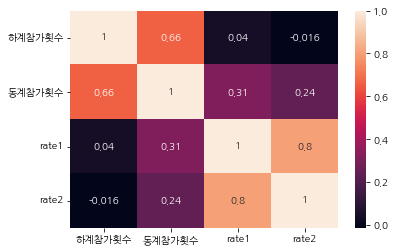

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(olympics_data[['하계참가횟수', '동계참가횟수', 'rate1', 'rate2']].corr(),annot=True)
plt.show()
#하계대회 참가횟수 대비 메달 수(rate1)와 동계대회 참가횟수 대비 메달 수(rate2)의 상관계수는 0.8이다.
#둘의 상관관계는 높다. 1에 가까울수록 양의 상관관계이다.
#두 변수를 조사했을때, 나의 생각으로는 하계올림픽에서 성적이 좋은 국가들이 동계올림픽에서도 성적이 확률이 높다.

학번: 19006060

이름: 최성호